In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
theme_colors = ['#F9B1B8',  '#EE4355',  '#B60618','#820815']

color_palette = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']

font = 'Courier New'

from sklearn import tree
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sktime.performance_metrics.forecasting import MedianRelativeAbsoluteError

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


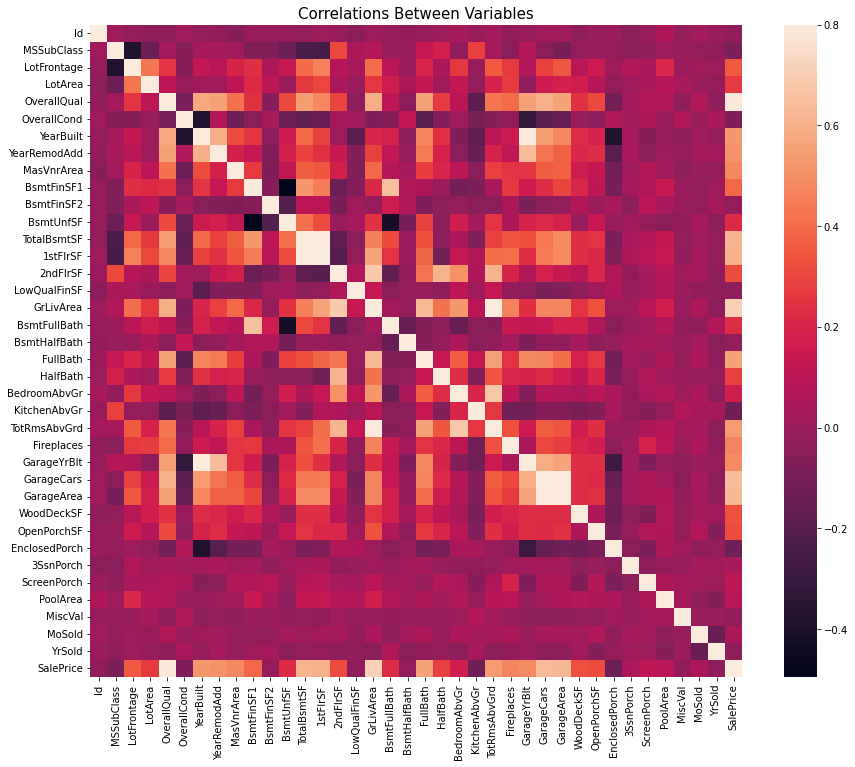

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, vmax=0.8, square=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [9]:
important_num_cols = list(df.corr()["SalePrice"][(df.corr()["SalePrice"]>0.50) | (df.corr()["SalePrice"]<-0.50)].index)
#cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols# + cat_cols

df = df[important_cols]
df.describe()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   TotalBsmtSF   1460 non-null   int64
 4   1stFlrSF      1460 non-null   int64
 5   GrLivArea     1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageCars    1460 non-null   int64
 9   GarageArea    1460 non-null   int64
 10  SalePrice     1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [37]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())
Round = round(np.mean(df),2),'+/-',round(np.std(df),2)
print(Round)
#df.mean(),'+/-',df.std()

Missing Values by Column
------------------------------
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0
(OverallQual          6.10
YearBuilt         1971.27
YearRemodAdd      1984.87
TotalBsmtSF       1057.43
1stFlrSF          1162.63
GrLivArea         1515.46
FullBath             1.57
TotRmsAbvGrd         6.52
GarageCars           1.77
GarageArea         472.98
SalePrice       180921.20
dtype: float64, '+/-', OverallQual         1.38
YearBuilt          30.19
YearRemodAdd       20.64
TotalBsmtSF       438.56
1stFlrSF          386.46
GrLivArea         525.30
FullBath            0.55
TotRmsAbvGrd        1.62
GarageCars          0.75
GarageArea        213.73
SalePrice       79415.29
dtype: float64)


In [20]:
Neighborhood_count = df.groupby(['Neighborhood']).size().reset_index().rename(columns={0: 'count'})
OverallQual_count = df.groupby(['OverallQual']).size().reset_index().rename(columns={0: 'count'})
ExterQual_count = df.groupby(['ExterQual']).size().reset_index().rename(columns={0: 'count'})
Foundation_count = df.groupby(['Foundation']).size().reset_index().rename(columns={0: 'count'})
BsmtQual_count = df.groupby(['BsmtQual']).size().reset_index().rename(columns={0: 'count'})
BsmtFinType1_count = df.groupby(['BsmtFinType1']).size().reset_index().rename(columns={0: 'count'})
HeatingQC_count = df.groupby(['HeatingQC']).size().reset_index().rename(columns={0: 'count'})
FullBath_count = df.groupby(['FullBath']).size().reset_index().rename(columns={0: 'count'})
KitchenQual_count = df.groupby(['KitchenQual']).size().reset_index().rename(columns={0: 'count'})
Fireplaces_count = df.groupby(['Fireplaces']).size().reset_index().rename(columns={0: 'count'})
GarageFinish_count = df.groupby(['GarageFinish']).size().reset_index().rename(columns={0: 'count'})
GarageCars_count = df.groupby(['GarageCars']).size().reset_index().rename(columns={0: 'count'})


fig = make_subplots(rows=6, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])


## Sex Donut Chart
fig.add_trace(
    go.Pie(
        labels=Neighborhood_count['Neighborhood'],
        values=Neighborhood_count['count'],
        hole=.6,
        title='Neighborhood',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## Chest Pain Type Donut Chart
fig.add_trace(
    go.Pie(
        labels=OverallQual_count['OverallQual'],
        values=OverallQual_count['count'],
        hole=.6,
        title='OverallQual',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## Fasting Blood Sugar Donut Chart
fig.add_trace(
    go.Pie(
        labels=ExterQual_count['ExterQual'],
        values=ExterQual_count['count'],
        hole=.6,
        title='ExterQual',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## RestingECG Donut Chart
fig.add_trace(
    go.Pie(
        labels=Foundation_count['Foundation'],
        values=Foundation_count['count'],
        hole=.6,
        title='Foundation',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## ExerciseAngina Donut Chart
fig.add_trace(
    go.Pie(
        labels=BsmtQual_count['BsmtQual'],
        values=BsmtQual_count['count'],
        hole=.6,
        title='BsmtQual',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## ST_Slope Donut Chart
fig.add_trace(
    go.Pie(
        labels=BsmtFinType1_count['BsmtFinType1'],
        values=BsmtFinType1_count['count'],
        hole=.6,
        title='BsmtFinType1',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

fig.add_trace(
    go.Pie(
        labels=HeatingQC_count['HeatingQC'],
        values=HeatingQC_count['count'],
        hole=.6,
        title='HeatingQC',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=1
    )

fig.add_trace(
    go.Pie(
        labels=FullBath_count['FullBath'],
        values=FullBath_count['count'],
        hole=.6,
        title='FullBath',
        titlefont={'color':None, 'size': 24},
        ),
    row=4,col=2
    )

fig.add_trace(
    go.Pie(
        labels=KitchenQual_count['KitchenQual'],
        values=KitchenQual_count['count'],
        hole=.6,
        title='KitchenQual',
        titlefont={'color':None, 'size': 24},
        ),
    row=5,col=1
    )

fig.add_trace(
    go.Pie(
        labels=Fireplaces_count['Fireplaces'],
        values=Fireplaces_count['count'],
        hole=.6,
        title='Fireplaces',
        titlefont={'color':None, 'size': 24},
        ),
    row=5,col=2
    )

fig.add_trace(
    go.Pie(
        labels=GarageFinish_count['GarageFinish'],
        values=GarageFinish_count['count'],
        hole=.6,
        title='GarageFinish',
        titlefont={'color':None, 'size': 24},
        ),
    row=6,col=1
    )

fig.add_trace(
    go.Pie(
        labels=GarageCars_count['GarageCars'],
        values=GarageCars_count['count'],
        hole=.6,
        title='GarageCars',
        titlefont={'color':None, 'size': 24},
        ),
    row=6,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 50, 'family': 'Courier New'},
                  showlegend=False, 
                  height=5000, 
                  width=5000,
#                   paper_bgcolor="#333333",
                  template='plotly_dark',
                  title_x=0.5
                  )


fig.show()

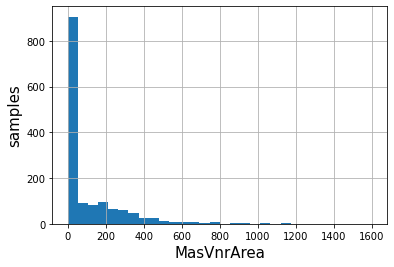

In [6]:
MasVnrArea=df['MasVnrArea']
MasVnrArea.hist(histtype='stepfilled', bins=30)
plt.xlabel('MasVnrArea',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

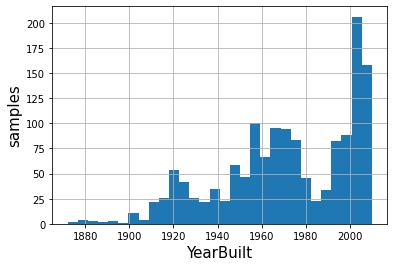

In [19]:
YearBuilt=df['YearBuilt']
YearBuilt.hist(histtype='stepfilled', bins=30)
plt.xlabel('YearBuilt',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

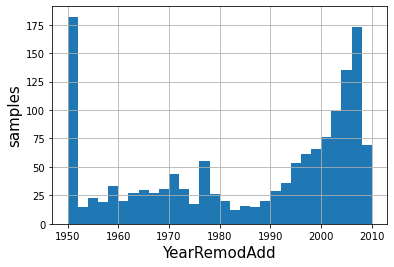

In [29]:
YearRemodAdd=df['YearRemodAdd']
YearRemodAdd.hist(histtype='stepfilled', bins=30)
plt.xlabel('YearRemodAdd',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

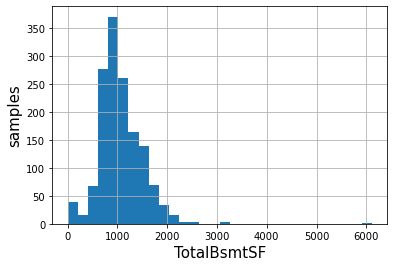

In [28]:
TotalBsmtSF=df['TotalBsmtSF']
TotalBsmtSF.hist(histtype='stepfilled', bins=30)
plt.xlabel('TotalBsmtSF',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

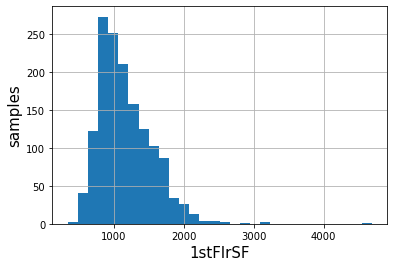

In [27]:
stFlrSF=df['1stFlrSF']
stFlrSF.hist(histtype='stepfilled', bins=30)
plt.xlabel('1stFlrSF',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

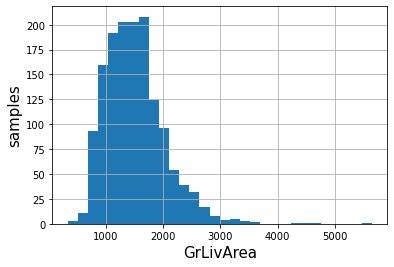

In [25]:
GrLivArea=df['GrLivArea']
GrLivArea.hist(histtype='stepfilled', bins=30)
plt.xlabel('GrLivArea',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

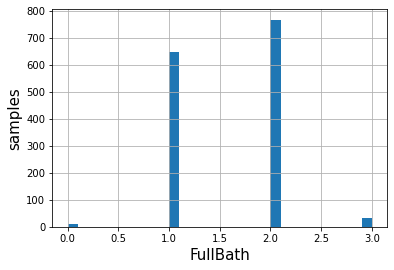

In [24]:
FullBath=df['FullBath']
FullBath.hist(histtype='stepfilled', bins=30)
plt.xlabel('FullBath',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

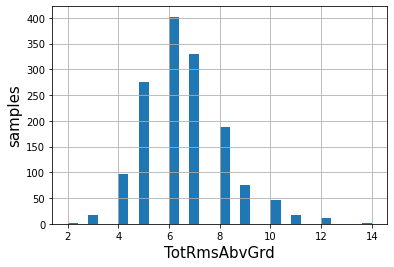

In [23]:
TotRmsAbvGrd=df['TotRmsAbvGrd']
TotRmsAbvGrd.hist(histtype='stepfilled', bins=30)
plt.xlabel('TotRmsAbvGrd',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

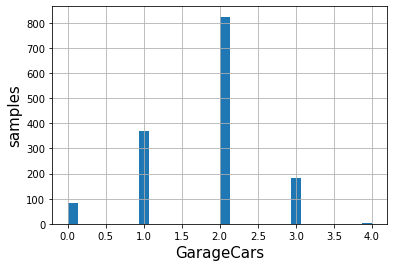

In [22]:
GarageCars=df['GarageCars']
GarageCars.hist(histtype='stepfilled', bins=30)
plt.xlabel('GarageCars',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

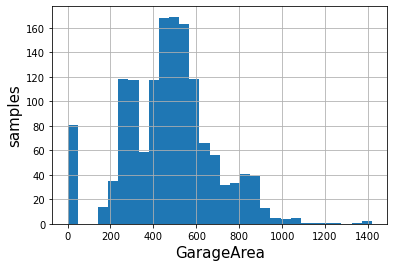

In [21]:
GarageArea=df['GarageArea']
GarageArea.hist(histtype='stepfilled', bins=30)
plt.xlabel('GarageArea',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

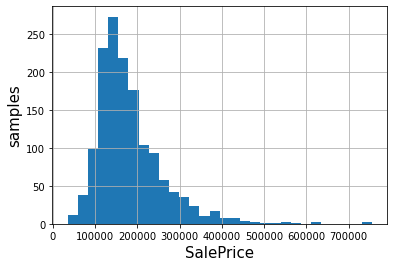

In [20]:
SalePrice=df['SalePrice']
SalePrice.hist(histtype='stepfilled', bins=30)
plt.xlabel('SalePrice',fontsize=15)
plt.ylabel('samples',fontsize=15)
plt.show()

In [10]:
new_df=df.dropna(axis=0, how='any').copy()
new_df.describe(include='all')

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1971.267808,1984.865753,1057.429452,1162.626712,1515.463699,1.565068,6.517808,1.767123,472.980137,180921.195890
std,1.382997,30.202904,20.645407,438.705324,386.587738,525.480383,0.550916,1.625393,0.747315,213.804841,79442.502883
min,1.000000,1872.000000,1950.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,795.750000,882.000000,1129.500000,1.000000,5.000000,1.000000,334.500000,129975.000000
50%,6.000000,1973.000000,1994.000000,991.500000,1087.000000,1464.000000,2.000000,6.000000,2.000000,480.000000,163000.000000
75%,7.000000,2000.000000,2004.000000,1298.250000,1391.250000,1776.750000,2.000000,7.000000,2.000000,576.000000,214000.000000
max,10.000000,2010.000000,2010.000000,6110.000000,4692.000000,5642.000000,3.000000,14.000000,4.000000,1418.000000,755000.000000


In [12]:
print('MSZoning',new_df['MSZoning'].unique())
print('Utilities',new_df['Utilities'].unique())
print('BldgType',new_df['BldgType'].unique())
print('Heating',new_df['Heating'].unique())
print('KitchenQual',new_df['KitchenQual'].unique())
print('SaleCondition',new_df['SaleCondition'].unique())
print('LandSlope',new_df['LandSlope'].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Utilities ['AllPub' 'NoSeWa']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Heating ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
KitchenQual ['Gd' 'TA' 'Ex' 'Fa']
SaleCondition ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']
LandSlope ['Gtl' 'Mod' 'Sev']


In [13]:
df_mapping=new_df.copy()

map_MSZoning ={'RL':0, 'RM':1, 'C (all)':2, 'FV':3, 'RH':4}
map_Utilities ={'AllPub':0, 'NoSeWa':1}
map_BldgType={'1Fam':0, '2fmCon':1, 'Duplex':2, 'TwnhsE':3, 'Twnhs':4}
map_Heating ={'GasA':0, 'GasW':1, 'Grav':2, 'Wall':3, 'OthW':4, 'Floor':5}
map_KitchenQual  ={'Gd':0, 'TA':1, 'Ex':2, 'Fa':3}
map_SaleCondition ={'Normal':0, 'Abnorml':1, 'Partial':2, 'AdjLand':3, 'Alloca':4, 'Family':5}
map_LandSlope={'Gtl':0, 'Mod':1, 'Sev':2}

df_mapping['MSZoning']=df_mapping['MSZoning'].map(map_MSZoning)
df_mapping['Utilities']=df_mapping['Utilities'].map(map_Utilities)
df_mapping['BldgType']=df_mapping['BldgType'].map(map_BldgType)
df_mapping['Heating']=df_mapping['Heating'].map(map_Heating)
df_mapping['KitchenQual']=df_mapping['KitchenQual'].map(map_KitchenQual)
df_mapping['SaleCondition']=df_mapping['SaleCondition'].map(map_SaleCondition)
df_mapping['LandSlope']=df_mapping['LandSlope'].map(map_LandSlope)
df_mapping.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,0,0,0,0,0,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,0,0,0,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,223500,0,0,0,0,0,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,140000,0,0,0,0,0,1,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,0,0,0,0,0,0,0


In [14]:
dummied_new_df=pd.get_dummies(new_df, columns=['MSZoning', 'Utilities', 'BldgType',
                                               'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope'])
dummied_new_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,...,1,0,0,0,0,1,0,1,0,0
1456,6,1978,1988,1542,2073,2073,2,7,2,500,...,1,0,0,0,0,1,0,1,0,0
1457,7,1941,2006,1152,1188,2340,2,9,1,252,...,0,0,0,0,0,1,0,1,0,0
1458,5,1950,1996,1078,1078,1078,1,5,1,240,...,0,0,0,0,0,1,0,1,0,0


In [11]:
#x = dummied_new_df.drop(['SalePrice'],axis=1).copy()
#y = dummied_new_df['SalePrice'].copy()
x = df.drop(['SalePrice'],axis=1).copy()
y = df['SalePrice'].copy()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [13]:
x_train1 = np.array(x[0:365])
y_train1 = np.array(y[0:365])
x_validation1 = np.array(x[365:730])
y_validation1 = np.array(y[365:730])

x_train2 = np.array(x[0:730])
y_train2 = np.array(y[0:730])
x_validation2 = np.array(x[730:1095])
y_validation2 = np.array(y[730:1095])

x_train3 = np.array(x[0:1095])
y_train3 = np.array(y[0:1095])
x_validation3 = np.array(x[1095:1460])
y_validation3 = np.array(y[1095:1460])

In [14]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train1,y_train1)
            
        train_pred=model.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 7734489538.01
mse_2_20: 7734489538.01
mse_2_100: 7734489538.01
mse_6_5: 7734489532.25
mse_6_20: 7734489532.25
mse_6_100: 7734489532.25
mse_8_5: 7017646121.73
mse_8_20: 7017646121.73
mse_8_100: 7017646121.73


In [15]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train2,y_train2)
            
        train_pred=model.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 5844703700.13
mse_2_20: 5844703700.13
mse_2_100: 5844703700.13
mse_6_5: 5844703688.92
mse_6_20: 5844703688.92
mse_6_100: 5844703688.92
mse_8_5: 4791568988.18
mse_8_20: 4791568988.18
mse_8_100: 4791557860.48


In [16]:
a = [2e-10,2e-6,2**8]
b = [2e-15,2e-10,2e-1]

mse_1_1 = 0
mse_1_2 = 0
mse_1_3 = 0
mse_2_1 = 0
mse_2_2 = 0
mse_2_3 = 0
mse_3_1 = 0
mse_3_2 = 0
mse_3_3 = 0

for i in a:
    for j in b:
        model=SVR(kernel='rbf', C=i, epsilon=j)
        model.fit(x_train3,y_train3)
            
        train_pred=model.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2e-10 and j==2e-15:
            mse_1_1 += mse
        if i==2e-10 and j==2e-10:
            mse_1_2 += mse
        if i==2e-10 and j==2e-1:
            mse_1_3 += mse
        if i==2e-6 and j==2e-15:
            mse_2_1 += mse
        if i==2e-6 and j==2e-10:
            mse_2_2 += mse
        if i==2e-6 and j==2e-1:
            mse_2_3 += mse
        if i==2**8 and j==2e-15:
            mse_3_1 += mse
        if i==2**8 and j==2e-10:
            mse_3_2 += mse
        if i==2**8 and j==2e-1:
            mse_3_3 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_1_1),2))
print('mse_2_20:',round((mse_1_2),2))
print('mse_2_100:',round((mse_1_3),2))
print('mse_6_5:',round((mse_2_1),2))
print('mse_6_20:',round((mse_2_2),2))
print('mse_6_100:',round((mse_2_3),2))
print('mse_8_5:',round((mse_3_1),2))
print('mse_8_20:',round((mse_3_2),2))
print('mse_8_100:',round((mse_3_3),2))

MSE:
mse_2_5: 6444787741.44
mse_2_20: 6444787741.44
mse_2_100: 6444781133.33
mse_6_5: 6444787727.36
mse_6_20: 6444787727.36
mse_6_100: 6444781119.86
mse_8_5: 4939116920.74
mse_8_20: 4939116920.74
mse_8_100: 4939122448.31


In [21]:
mse_2_5 = [7734489538.01, 5844703700.13, 6444787741.44]
mse_2_20 = [7734489538.01, 5844703700.13, 6444787741.44]
mse_2_100 = [7734489538.01, 5844703700.13, 6444781133.33]
mse_6_5 = [7734489534.1, 5844703692.69, 6444787731.74]
mse_6_20 = [7734489534.1, 5844703692.69, 6444787731.74]
mse_6_100 = [7734489534.1, 5844703692.69, 6444781124.02]
mse_8_5 = [7259827223.44, 5115212720.43, 5346251086.07]
mse_8_20 = [7259827223.44, 5115212720.43, 5346251086.07]
mse_8_100 = [7259827223.44, 5115212720.43, 5346251086.07]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 6674660326.53 +/- 788438829.71
mse_2_20: 6674660326.53 +/- 788438829.71
mse_2_100: 6674658123.82 +/- 788439471.92
mse_6_5: 6674660319.51 +/- 788438831.51
mse_6_20: 6674660319.51 +/- 788438831.51
mse_6_100: 6674658116.94 +/- 788439473.69
mse_8_5: 5907097009.98 +/- 961163861.99
mse_8_20: 5907097009.98 +/- 961163861.99
mse_8_100: 5907097009.98 +/- 961163861.99


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model=SVR(kernel='poly', C=2**8, epsilon=2e-10)
model.fit(x_train,y_train)
mdrae = MedianRelativeAbsoluteError()

train_pred = model.predict(x_train)
y_pred_benchmark = train_pred*1.1
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = mdrae(y_train, train_pred, y_pred_benchmark=y_pred_benchmark)

test_pred = model.predict(x_test)
y_pred_benchmark = test_pred*1.1
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = mdrae(y_test, test_pred, y_pred_benchmark=y_pred_benchmark)

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  3018334912.7323
train_rmse:  54939.3749
train_mape:  0.221
train_smape:  20.4699
train_mase:  0.4647
train_mdrae:  0.7737

test_mse :  7672717961.8574
test_rmse:  87594.0521
test_mape:  0.2348
test_smape:  20.2071
test_mase:  0.5155
test_mdrae:  0.7592


In [36]:
x_train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,7,2003,2003,856,856,1710,2,8,2,548,...,0,0,0,0,0,1,0,1,0,0
1,6,1976,1976,1262,1262,1262,2,6,2,460,...,1,0,0,0,0,1,0,1,0,0
2,7,2001,2002,920,920,1786,2,6,2,608,...,0,0,0,0,0,1,0,1,0,0
3,7,1915,1970,756,961,1717,1,7,3,642,...,0,1,0,0,0,0,0,1,0,0
4,8,2000,2000,1145,1145,2198,2,9,3,836,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,4,1969,1969,1198,1258,1258,0,6,2,400,...,1,0,0,1,0,0,0,1,0,0
1164,5,1978,1978,1360,1432,1432,1,5,2,588,...,0,0,0,0,0,1,0,1,0,0
1165,7,2009,2009,1502,1502,1502,2,7,2,644,...,0,0,0,0,0,0,1,1,0,0
1166,8,2008,2008,1694,1694,1694,2,7,3,776,...,0,0,0,0,0,1,0,1,0,0


In [50]:
#第一次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train1,y_train1)
            
        train_pred=model_cart.predict(x_validation1)
        mse=mean_squared_error(y_validation1,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 3016300457.67
mse_2_20: 3016300457.67
mse_2_100: 3016300457.67
mse_6_5: 2738579359.17
mse_6_20: 2005081038.67
mse_6_100: 2047889218.4
mse_8_5: 2738579359.17
mse_8_20: 2005081038.67
mse_8_100: 2154521074.0


In [51]:
#第二次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train2,y_train2)
            
        train_pred=model_cart.predict(x_validation2)
        mse=mean_squared_error(y_validation2,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 2269346400.27
mse_2_20: 2269346400.27
mse_2_100: 2269346400.27
mse_6_5: 1999405212.81
mse_6_20: 1412157253.0
mse_6_100: 1327240261.19
mse_8_5: 1999405212.81
mse_8_20: 1412157253.0
mse_8_100: 1276810890.2


In [52]:
#第三次
a = [2,6,8]
b = [5,20,100]

mse_2_5 = 0
mse_2_20 = 0
mse_2_100 = 0
mse_6_5 = 0
mse_6_20 = 0
mse_6_100 = 0
mse_8_5 = 0
mse_8_20 = 0
mse_8_100 = 0

for i in a:
    for j in b:
        model_cart=DecisionTreeRegressor(max_depth=i,max_leaf_nodes=j,random_state=0)
        model_cart.fit(x_train3,y_train3)
            
        train_pred=model_cart.predict(x_validation3)
        mse=mean_squared_error(y_validation3,train_pred,squared=True)
            
        if i==2 and j==5:
            mse_2_5 += mse
        if i==2 and j==20:
            mse_2_20 += mse
        if i==2 and j==100:
            mse_2_100 += mse
        if i==6 and j==5:
            mse_6_5 += mse
        if i==6 and j==20:
            mse_6_20 += mse
        if i==6 and j==100:
            mse_6_100 += mse
        if i==8 and j==5:
            mse_8_5 += mse
        if i==8 and j==20:
            mse_8_20 += mse
        if i==8 and j==100:
            mse_8_100 += mse
                
print('MSE:')
print('mse_2_5:',round((mse_2_5),2))
print('mse_2_20:',round((mse_2_20),2))
print('mse_2_100:',round((mse_2_100),2))
print('mse_6_5:',round((mse_6_5),2))
print('mse_6_20:',round((mse_6_20),2))
print('mse_6_100:',round((mse_6_100),2))
print('mse_8_5:',round((mse_8_5),2))
print('mse_8_20:',round((mse_8_20),2))
print('mse_8_100:',round((mse_8_100),2))

MSE:
mse_2_5: 2540723298.45
mse_2_20: 2540723298.45
mse_2_100: 2540723298.45
mse_6_5: 2259799581.51
mse_6_20: 1819159804.61
mse_6_100: 1774944643.12
mse_8_5: 2259799581.51
mse_8_20: 1610333960.79
mse_8_100: 1613335118.03


In [53]:
#三次平均
mse_2_5 = [3016300457.67, 2269346400.27, 2540723298.45]
mse_2_20 = [3016300457.67, 2269346400.27, 2540723298.45]
mse_2_100 = [3016300457.67, 2269346400.27, 2540723298.45]
mse_6_5 = [2738579359.17, 1999405212.81, 2259799581.51]
mse_6_20 = [2005081038.67, 1412157253.0, 1819159804.61]
mse_6_100 = [2047889218.4, 1327240261.19, 1774944643.12]
mse_8_5 = [2738579359.17, 1999405212.81, 2259799581.51]
mse_8_20 = [2005081038.67, 1412157253.0, 1610333960.79]
mse_8_100 = [2154521074.0, 1276810890.2, 1613335118.03]

print('mse_2_5:',round(np.mean(mse_2_5),2),'+/-',round(np.std(mse_2_5),2))
print('mse_2_20:',round(np.mean(mse_2_20),2),'+/-',round(np.std(mse_2_20),2))
print('mse_2_100:',round(np.mean(mse_2_100),2),'+/-',round(np.std(mse_2_100),2))
print('mse_6_5:',round(np.mean(mse_6_5),2),'+/-',round(np.std(mse_6_5),2))
print('mse_6_20:',round(np.mean(mse_6_20),2),'+/-',round(np.std(mse_6_20),2))
print('mse_6_100:',round(np.mean(mse_6_100),2),'+/-',round(np.std(mse_6_100),2))
print('mse_8_5:',round(np.mean(mse_8_5),2),'+/-',round(np.std(mse_8_5),2))
print('mse_8_20:',round(np.mean(mse_8_20),2),'+/-',round(np.std(mse_8_20),2))
print('mse_8_100:',round(np.mean(mse_8_100),2),'+/-',round(np.std(mse_8_100),2))

mse_2_5: 2608790052.13 +/- 308717673.81
mse_2_20: 2608790052.13 +/- 308717673.81
mse_2_100: 2608790052.13 +/- 308717673.81
mse_6_5: 2332594717.83 +/- 306125196.14
mse_6_20: 1745466032.09 +/- 247605510.15
mse_6_100: 1716691374.24 +/- 297073293.29
mse_8_5: 2332594717.83 +/- 306125196.14
mse_8_20: 1675857417.49 +/- 246454385.82
mse_8_100: 1681555694.08 +/- 361556198.43


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle=False)
model_cart=DecisionTreeRegressor(max_depth=8,max_leaf_nodes=20,random_state=0)
model_cart.fit(x_train,y_train)

train_pred = model.predict(x_train)
y_pred_benchmark = train_pred*1.1
train_mse = mean_squared_error(y_train,train_pred,squared=True)
train_rmse = mean_squared_error(y_train,train_pred, squared=False)
train_mape = mean_absolute_percentage_error(y_train,train_pred)
train_smape = 2*np.mean(np.abs(train_pred-y_train)/(np.abs(train_pred)+np.abs(y_train)))*100
train_mase = mean_absolute_scaled_error(y_train, train_pred, y_train=y_train)
train_mdrae = mdrae(y_train, train_pred, y_pred_benchmark=y_pred_benchmark)

test_pred = model.predict(x_test)
y_pred_benchmark = test_pred*1.1
test_mse = mean_squared_error(y_test,test_pred,squared=True)
test_rmse = mean_squared_error(y_test,test_pred, squared=False)
test_mape = mean_absolute_percentage_error(y_test,test_pred)
test_smape = 2*np.mean(np.abs(test_pred-y_test)/(np.abs(test_pred)+np.abs(y_test)))*100
test_mase = mean_absolute_scaled_error(y_test, test_pred, y_train=y_test)
test_mdrae = mdrae(y_test, test_pred, y_pred_benchmark=y_pred_benchmark)

print('train_mse : ', np.round(train_mse,4))
print('train_rmse: ', np.round(train_rmse,4))
print('train_mape: ', np.round(train_mape,4))
print('train_smape: ', np.round(train_smape,4))
print('train_mase: ', np.round(train_mase,4))
print('train_mdrae: ', np.round(train_mdrae,4))
print('')
print('test_mse : ', np.round(test_mse,4))
print('test_rmse: ', np.round(test_rmse,4))
print('test_mape: ', np.round(test_mape,4))
print('test_smape: ', np.round(test_smape,4))
print('test_mase: ', np.round(test_mase,4))
print('test_mdrae: ', np.round(test_mdrae,4))

train_mse :  3018334912.7323
train_rmse:  54939.3749
train_mape:  0.221
train_smape:  20.4699
train_mase:  0.4647
train_mdrae:  0.7737

test_mse :  7672717961.8574
test_rmse:  87594.0521
test_mape:  0.2348
test_smape:  20.2071
test_mase:  0.5155
test_mdrae:  0.7592
